In [1]:
import pickle
from collections import defaultdict
import ResumeHelper
import SegementerClassifier

In [2]:
def loadClassifier(model_name):
    model = joblib.load("Models/"+model_name+".pkl")
    return model

In [76]:
import numpy as np

In [86]:
import nltk

In [3]:
def loaddataset():
    with open('PersonalResume.pickle', 'rb') as handle:
        return pickle.load(handle)

In [ ]:
segmnetation_values = np.unique(y_data)

In [4]:
data = loaddataset()
X,Y=SegementerClassifier.prepare_data_for_training(data)

In [75]:
y_data=[]
for resume in data:
    for pharagraph_num in data[resume]:
        y_data.append(data[resume][pharagraph_num][-1])

In [77]:
segmnetation_values = np.unique(y_data)
print(segmnetation_values)

['B-Education' 'B-Experience' 'B-Others' 'B-Personal_Information'
 'B-Projects' 'B-Skills' 'I-Education' 'I-Experience' 'I-Others'
 'I-Personal_Information' 'I-Projects' 'I-Skills' 'O']


In [81]:
y_data[4]

'I-Experience'

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [80]:
Y[4]

7

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def print_confusion_matrix(y_test,y_test_predict):
    confusion_mc = confusion_matrix(y_test, y_test_predict)
    df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,13)],columns = [i for i in range(0,13)])
    plt.figure(figsize = (9.5,9))
    sns.heatmap(df_cm, annot=True)
    plt.title('Accuracy:{0:.3f}'.format(accuracy_score(y_test,y_test_predict)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [84]:
from sklearn.externals import joblib
classifier=loadClassifier('NaiveBayesClassifier')

0.8766928011404134


TypeError: 'numpy.float64' object is not callable

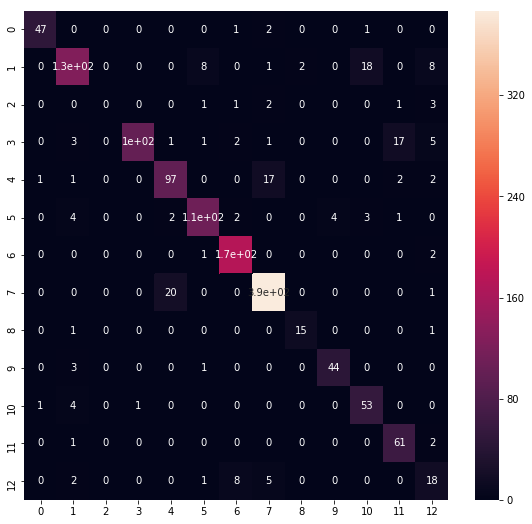

In [88]:
x_data,y_data=SegementerClassifier.splitdata(data)
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data, random_state=0)
accuracy=nltk.classify.accuracy(classifier,ResumeHelper.merge(X_test,y_test))
y_test_predict = classifier.classify_many(X_test)
print(accuracy)
print_confusion_matrix(y_test,y_test_predict)